# **Collecting Data**
This dataset for orange resistance is from kaggle :
1. https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification

But, we label it manually by having experiment in saving orange in home and see what days it change, and looking for timelapse in youtube as a reference how the orange change days by days. 

For this model, we take only the good quality orange dataset. 

Before start, ensure to download dataset. We already zip it to drive in link below 
https://drive.google.com/file/d/1eDk3JkUpz5mqfvCkE1ZuZ8UFa-w8IfLG/view?usp=sharing

Reference : 
1. https://keras.io/api/applications/inceptionv3/
2. https://keras.io/api/applications/#usage-examples-for-image-classification-models
3. https://keras.io/guides/transfer_learning/

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import shutil
import os

source = r'/content/gdrive/MyDrive/orange_new.zip'
destination = r'/content/orange.zip'
shutil.copyfile(source, destination)

'/content/orange.zip'

In [4]:
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

# **Explore Data and Preprocessing**

In [5]:
path = r'/content/orange/'
categories= os.listdir(path)
categories

['3', '12', '1', '7']

12, 7, 1, 3 means that the fruit is still good for 12 more days, 7 more days, 1 more days or 3 more days

In [6]:
def count_num_file(path,name_dir):
  num_file = len(os.listdir(path+name_dir))
  return num_file
  
for categorie in categories :
  print("{} more days directory : {} file ".format(categorie, count_num_file(path,categorie)))

3 more days directory : 288 file 
12 more days directory : 741 file 
1 more days directory : 72 file 
7 more days directory : 469 file 


**Image Augmentation**


---


1 more days directory have small number of file (72) compare to the large one is 7 more days that have 469 file. So we add more augmentation on that directory. 

In [8]:
import os
from PIL import Image 
path_rotate = r'/content/orange/1/'
file_name = os.listdir(path_rotate)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(40).save(path_rotate+'rotate_40'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(50).save(path_rotate+'rotate_50'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(65).save(path_rotate+'rotate_65'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(85).save(path_rotate+'rotate_85'+i)
            
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(100).save(path_rotate+'rotate_100'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(125).save(path_rotate+'rotate_125'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(145).save(path_rotate+'rotate_145'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(200).save(path_rotate+'rotate_200'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(225).save(path_rotate+'rotate_225'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(240).save(path_rotate+'rotate_240'+i)

In [9]:
for categorie in categories :
  print("{} more days folder : {} file ".format(categorie, count_num_file(path,categorie)))

3 more days folder : 288 file 
12 more days folder : 741 file 
1 more days folder : 152 file 
7 more days folder : 469 file 


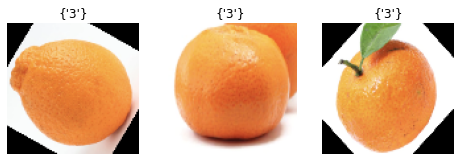

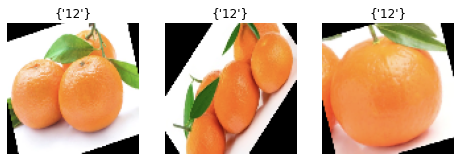

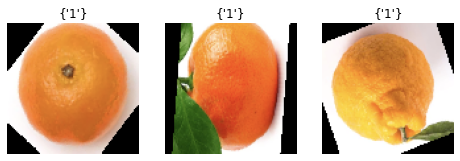

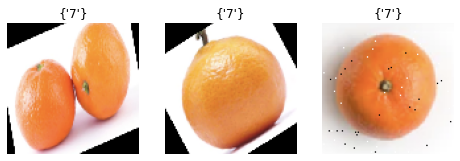

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline


def plot_img(name):
  img = [fn for fn in os.listdir(f'{path}/{name}')]
  
 
  select_img= np.random.choice(img, 3, replace = False)

  
  fig = plt.figure(figsize = (8,6))
  for i in range(3):
      if i < 3:
        fp = f'{path}/{name}/{select_img[i]}'
        label = {name}
      
      ax = fig.add_subplot(1,3,i+1)
    
      fn = image.load_img(fp, target_size = (100,100))
      plt.imshow(fn)
      plt.title(label)
      plt.axis('off')
  plt.show()

for categorie in categories:
  plot_img(categorie)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,                 
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)

In [15]:
train_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='training')
val_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1322 images belonging to 4 classes.
Found 328 images belonging to 4 classes.


# **Build model with Inception V3**

In [16]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

#Using the inception_v3   
base = InceptionV3(input_shape=(100,100,3), include_top = False)


87916544/87910968 [==============================] - 1s 0us/step


In [17]:
#Check the layer
for i, layer in enumerate(base.layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [ ]:
for layer in base.layers[:200]:
    layer.trainable = False
for layer in base.layers[200:]:
    layer.trainable = True

In [ ]:

import tensorflow as tf
model = tf.keras.models.Sequential([
    
    base,
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
batch_normalization_94 (Batc (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 22,855,972
Trainable params: 15,856,452
Non-trainable params: 6,999,520
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 15, 
                                        restore_best_weights = True)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99!")
callbacks = myCallback()

In [ ]:
modelcheck = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=80,
      validation_data=val_generator, 
      validation_steps=5, 
      callbacks=[modelcheck,earlystop,callbacks],
      verbose=1)

Epoch 1/80
20/20 [==============================] - 43s 2s/step - loss: 1.9120 - accuracy: 0.4078 - val_loss: 9.8105 - val_accuracy: 0.2125

Epoch 00001: val_accuracy improved from -inf to 0.21250, saving model to best_model.h5
Epoch 2/80
20/20 [==============================] - 35s 2s/step - loss: 1.1867 - accuracy: 0.5437 - val_loss: 11.7926 - val_accuracy: 0.1813

Epoch 00002: val_accuracy did not improve from 0.21250
Epoch 3/80
20/20 [==============================] - 35s 2s/step - loss: 0.9787 - accuracy: 0.6313 - val_loss: 2.6673 - val_accuracy: 0.2313

Epoch 00003: val_accuracy improved from 0.21250 to 0.23125, saving model to best_model.h5
Epoch 4/80
20/20 [==============================] - 34s 2s/step - loss: 0.8895 - accuracy: 0.6424 - val_loss: 2.7852 - val_accuracy: 0.5000

Epoch 00004: val_accuracy improved from 0.23125 to 0.50000, saving model to best_model.h5
Epoch 5/80
20/20 [==============================] - 35s 2s/step - loss: 0.7891 - accuracy: 0.6766 - val_loss: 1.1

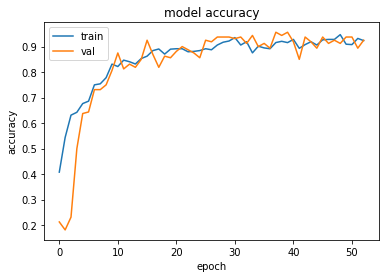

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Evaluate the model accuracy 
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

11/11 [==============================] - 7s 572ms/step - loss: 0.2308 - accuracy: 0.9207
Accuracy train:  0.9084720015525818
Accuracy test:  0.9207317233085632


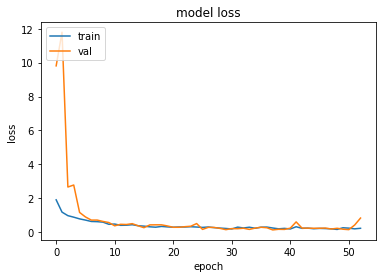

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Try test some images**

In [ ]:
#get index so we could know the order
train_generator.class_indices

{'1': 0, '12': 1, '3': 2, '7': 3}

Saving Jepretan Layar 2021-06-03 pukul 19.28.45.png to Jepretan Layar 2021-06-03 pukul 19.28.45.png
Jepretan Layar 2021-06-03 pukul 19.28.45.png
[[3.2633523e-14 1.0000000e+00 8.4936287e-38 0.0000000e+00]]
12 more days


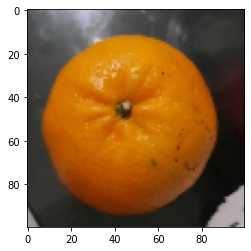

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size= 32)
  hasil = np.argmax(classes)
  print(fn)
  print(classes)

 
 #refer to our class indices
 #{'1': 0, '12': 1, '3': 2, '7': 3}
  if classes[0,0] == 1.0:
    print('1 more day')
  elif classes[0,1] == 1.0:
    print('12 more days')
  elif classes[0,2] == 1.0:
    print('3 more days')
  else:
    print('7 more days')

# **Export Model**


---

You could choose type of format that you want to save, tflite or h5 or other. Below, we save it in tflite and h5. But if you want to deploy first on cloud, you can save it to h5.

In [ ]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\n Already saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 8612
drwxr-xr-x 2 root root    4096 Jun  3 10:05 assets
-rw-r--r-- 1 root root  974036 Jun  3 10:05 keras_metadata.pb
-rw-r--r-- 1 root root 7835364 Jun  3 10:05 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 10:05 variables


**To save in tf lite format**

In [ ]:

converter = tf.lite.TFLiteConverter.from_saved_model(export_path) # Intialize the TFLite converter to load the SavedModel
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

tflite_model = converter.convert()
tflite_model_file = 'Orange-resistance-prediction.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('Orange-resistance-prediction.txt', 'w') as f:
    f.write('\n'.join(categories))

In [ ]:
try:
    files.download('Orange-resistance-prediction.tflite')
    files.download('Orange-resistance-prediction.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**To save in h5 format**

In [ ]:
saved_model_path = "./Orange-resistance-prediction.h5"
model.save(saved_model_path)